In [11]:
from __future__ import division
import numpy as np
import epgcpmg as epg
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def numerical_gradient(myfun, myparams, e=1e-5):

    initial_params = myparams.copy()
    num_grad = np.zeros(initial_params.shape)
    perturb = np.zeros(initial_params.shape)
    
    for p in range(len(initial_params)):
        
        perturb[p] = e
        
        loss2 = myfun(myparams + perturb)
        loss1 = myfun(myparams - perturb)
        
        num_grad[p] = (loss2 - loss1) / (2 * e)
        
        perturb[p] = 0.

        return num_grad

In [13]:
def read_angles(fliptable):
    f = open(fliptable, 'r')
    angles = []
    for line in f.readlines():
        angles.append(float(line))
    f.close()
    return np.array(angles)

prop grad time: 0.0648880004883
num grad time: 54.5052659512
T1 numerical vs prop gradient error: 6.82600162647e-07
T2 numerical vs prop gradient error: 1.64946309774e-08


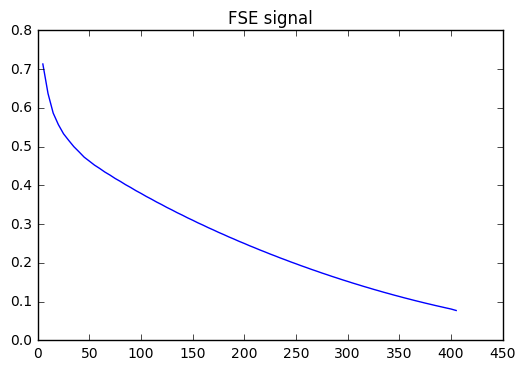

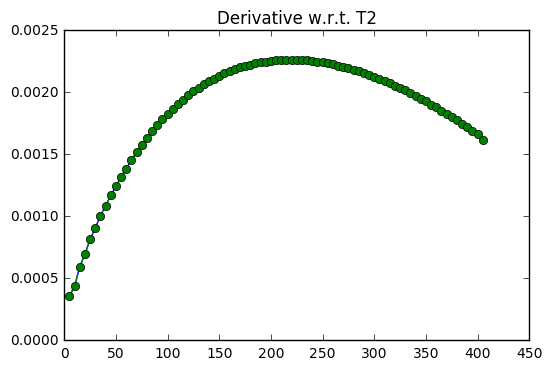

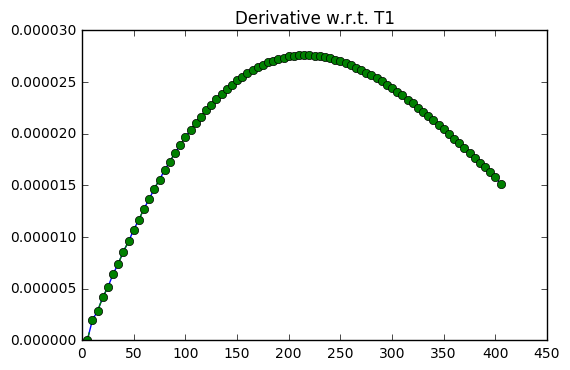

In [14]:
T1 = 1000
T2 = 100
TE = 5

T = 81

# 0.26947104
# 0.52563555
# 0.76898634

echo_times = np.arange(TE, TE*(T+1), TE)

angles_rad = 120 * np.ones((T,)) * np.pi/180
angles_rad = np.pi/180 * read_angles('flipangles.txt.814192544')[:T]


z1 = epg.FSE_signal(angles_rad, TE, T1, T2)

tic = time.time()
w1 = epg.FSE_signal_prime_T1(angles_rad, TE, T1, T2)
w2 = epg.FSE_signal_prime_T2(angles_rad, TE, T1, T2)
toc = time.time()
print 'prop grad time:', toc-tic
# w2_th = echo_times / (T2**2) * exp(-echo_times/T2)

tic = time.time()
w1_num = np.zeros((T,))
w2_num = np.zeros((T,))
for i in range(T):
    w2_num[i] = numerical_gradient(lambda x: epg.FSE_signal(angles_rad, TE, T1, x)[i], np.array([T2]))
    w1_num[i] = numerical_gradient(lambda x: epg.FSE_signal(angles_rad, TE, x, T2)[i], np.array([T1]))
toc = time.time()

print 'num grad time:', toc-tic

print 'T1 numerical vs prop gradient error:', np.linalg.norm(w1_num - w1.T) / np.linalg.norm(w1)
print 'T2 numerical vs prop gradient error:', np.linalg.norm(w2_num - w2.T) / np.linalg.norm(w2)

plt.figure()
plt.plot(echo_times, z1)
plt.title('FSE signal')

plt.figure()
plt.plot(echo_times, w2, echo_times, w2_num, 'o--')
plt.title('Derivative w.r.t. T2')

plt.figure()
plt.plot(echo_times, w1, echo_times, w1_num, 'o--')
plt.title('Derivative w.r.t. T1')

